In [89]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/Ataullha/Demo-Dataset/refs/heads/main/income.csv')

In [90]:
df.head(2)

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000


In [91]:
df['Age'] = (df['Age']-df['Age'].min()) / (df['Age'].max() - df['Age'].min())
df['Income($)'] = (df['Income($)']-df['Income($)'].min()) / (df['Income($)'].max() - df['Income($)'].min())

In [92]:
df.head(2)

,Name,Age,Income($)
0,Rob,0.058824,0.213675
1,Michael,0.176471,0.384615


In [93]:
from sklearn.cluster import KMeans

In [94]:
# SSE = Sum Sqaure Error
sse = []
for k in range(1, 12):
    km = KMeans(n_clusters=k)
    km.fit(df[["Age", "Income($)"]])
    sse.append(km.inertia_)

In [95]:
import matplotlib.pyplot as plt

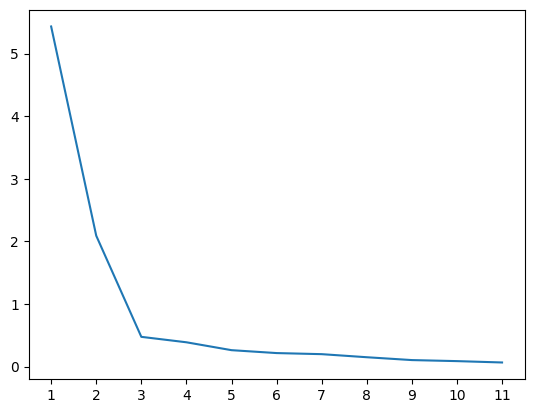

In [96]:
plt.plot(range(1,12), sse)
plt.xticks(range(1,12))
plt.show()

In [97]:
km = KMeans(n_clusters=3, random_state=42)
pred_cluster = km.fit_predict(df[['Age', 'Income($)']])

In [98]:
df['cluster'] = pred_cluster
clstr1 = df[df['cluster']==0] 
clstr2 = df[df['cluster']==1] 
clstr3 = df[df['cluster']==2] 

In [99]:
centroids = km.cluster_centers_
centroids[:,0]

array([0.72268908, 0.1372549 , 0.85294118])

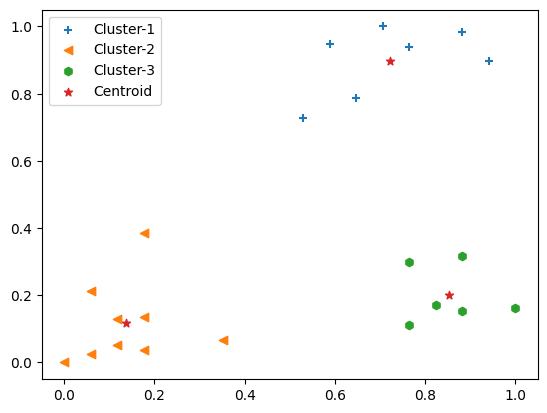

In [100]:
plt.scatter(clstr1["Age"], clstr1["Income($)"], marker="+", label="Cluster-1")
plt.scatter(clstr2["Age"], clstr2["Income($)"], marker="<", label="Cluster-2")
plt.scatter(clstr3["Age"], clstr3["Income($)"], marker="h", label="Cluster-3")
plt.scatter(centroids[:, 0], centroids[:, 1], marker="*", label="Centroid")
plt.legend()
plt.show()